In [29]:
from pykrx import stock
from datetime import datetime
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

## Step 1. KOSPI 200 거래정보 가져오기

In [30]:
period_m = pd.period_range('201901', '202206', freq='M')
period_m = period_m.to_timestamp()
period_m

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01'],
              dtype='datetime64[ns]', freq='MS')

In [31]:
import requests

In [32]:
today = datetime.today().strftime('%Y%m%d')
payloads = {
    'bld': 'dbms/MDC/STAT/standard/MDCSTAT00702',
    'locale': 'ko_KR',
    'searchType': 'P',
    'idxIndMidclssCd': '02',
    'trdDd': today,
    'tboxindTpCd_finder_equidx0_0': '코스피 200',
    'indTpCd': '1',
    'indTpCd2':'028',
    'codeNmindTpCd_finder_equidx0_0': '코스피 200',
    'strtDd': '20100101',
    'endDd': today,
    'csvxls_isNo': 'false'
}

In [33]:
res = requests.post('http://data.krx.co.kr/comm/bldAttendant/getJsonData.cmd', data=payloads)
res

<Response [200]>

In [34]:
kospi_200 = pd.DataFrame(res.json()['output'])
kospi_200.columns = ['일자','종가','-','대비','등락률','PER','선행PER','PBR','배당수익률']
kospi_200


,일자,종가,-,대비,등락률,PER,선행PER,PBR,배당수익률
0,2022/06/03,352.01,1,1.50,0.43,9.78,9.95,1.04,2.06
1,2022/06/02,350.51,2,-4.03,-1.14,9.74,9.91,1.04,2.07
2,2022/05/31,354.54,1,2.05,0.58,9.86,9.78,1.05,2.05
3,2022/05/30,352.49,1,4.45,1.28,9.80,9.67,1.04,2.06
4,2022/05/27,348.04,1,3.78,1.10,9.67,9.69,1.03,2.08
...,...,...,...,...,...,...,...,...,...
3060,2010/01/08,222.66,1,1.35,0.61,23.07,-,1.42,1.14
3061,2010/01/07,221.31,2,-3.36,-1.50,22.93,-,1.41,1.15
3062,2010/01/06,224.67,1,1.83,0.82,23.25,-,1.43,1.14
3063,2010/01/05,222.84,2,-0.65,-0.29,23.04,-,1.42,1.15


In [35]:
kospi_200.drop(['-'], axis=1, inplace=True) # 대비 및 등락률 음/양 표시
kospi_200

,일자,종가,대비,등락률,PER,선행PER,PBR,배당수익률
0,2022/06/03,352.01,1.50,0.43,9.78,9.95,1.04,2.06
1,2022/06/02,350.51,-4.03,-1.14,9.74,9.91,1.04,2.07
2,2022/05/31,354.54,2.05,0.58,9.86,9.78,1.05,2.05
3,2022/05/30,352.49,4.45,1.28,9.80,9.67,1.04,2.06
4,2022/05/27,348.04,3.78,1.10,9.67,9.69,1.03,2.08
...,...,...,...,...,...,...,...,...
3060,2010/01/08,222.66,1.35,0.61,23.07,-,1.42,1.14
3061,2010/01/07,221.31,-3.36,-1.50,22.93,-,1.41,1.15
3062,2010/01/06,224.67,1.83,0.82,23.25,-,1.43,1.14
3063,2010/01/05,222.84,-0.65,-0.29,23.04,-,1.42,1.15


In [36]:
kospi_200['일자'] = kospi_200['일자'].apply(lambda x : x.replace('/','-'))
kospi_200

,일자,종가,대비,등락률,PER,선행PER,PBR,배당수익률
0,2022-06-03,352.01,1.50,0.43,9.78,9.95,1.04,2.06
1,2022-06-02,350.51,-4.03,-1.14,9.74,9.91,1.04,2.07
2,2022-05-31,354.54,2.05,0.58,9.86,9.78,1.05,2.05
3,2022-05-30,352.49,4.45,1.28,9.80,9.67,1.04,2.06
4,2022-05-27,348.04,3.78,1.10,9.67,9.69,1.03,2.08
...,...,...,...,...,...,...,...,...
3060,2010-01-08,222.66,1.35,0.61,23.07,-,1.42,1.14
3061,2010-01-07,221.31,-3.36,-1.50,22.93,-,1.41,1.15
3062,2010-01-06,224.67,1.83,0.82,23.25,-,1.43,1.14
3063,2010-01-05,222.84,-0.65,-0.29,23.04,-,1.42,1.15


## Step 2. 환율 정보 가져오기

In [37]:
today = datetime.today().strftime('%Y%m%d')
header = {
    'Accept': 'application/json, text/plain, */*',
    'Origin': 'https://finance.yahoo.com',
    'Accept-Encoding': 'gzip, deflate, br',
    'Host': 'query1.finance.yahoo.com',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.5 Safari/605.1.15',
    'Referer': 'https://finance.yahoo.com/quote/KRW%3DX/chart?p=KRW%3DX',
    'Accept-Language': 'ko-KR,ko;q=0.9',
    'Connection': 'keep-alive',
    'domain-id': 'kr'

}

In [ ]:
today = datetime.today().strftime('%Y%m%d')
header = {
    'Accept': 'application/json, text/plain, */*',
    'Origin': 'https://finance.yahoo.com',
    'Accept-Encoding': 'gzip, deflate, br',
    'Host': 'query1.finance.yahoo.com',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/15.5 Safari/605.1.15',
    'Referer': 'https://finance.yahoo.com/quote/KRW%3DX/chart?p=KRW%3DX',
    'Accept-Language': 'ko-KR,ko;q=0.9',
    'Connection': 'keep-alive',
    'domain-id': 'kr'

}

In [38]:
today_unix = int(datetime.today().timestamp())
today_unix

1654418990

In [39]:
res = requests.get(f'https://query1.finance.yahoo.com/v8/finance/chart/KRW=X?symbol=KRW%3DX&period1=0&period2={today_unix}\
                    &useYfid=true&interval=1d&includePrePost=true&events=div%7Csplit%7Cearn&lang=en-US&region=US\
                    &crumb=FaSnnHtSp6P&corsDomain=finance.yahoo.com', headers=header)
res

<Response [200]>

In [40]:
res.json()

{'chart': {'result': [{'meta': {'currency': 'KRW',
     'symbol': 'KRW=X',
     'exchangeName': 'CCY',
     'instrumentType': 'CURRENCY',
     'firstTradeDate': 1070236800,
     'regularMarketTime': 1654345944,
     'gmtoffset': 3600,
     'timezone': 'BST',
     'exchangeTimezoneName': 'Europe/London',
     'regularMarketPrice': 1250.58,
     'chartPreviousClose': 1198.4,
     'priceHint': 4,
     'currentTradingPeriod': {'pre': {'timezone': 'BST',
       'start': 1654210800,
       'end': 1654210800,
       'gmtoffset': 3600},
      'regular': {'timezone': 'BST',
       'start': 1654210800,
       'end': 1654297140,
       'gmtoffset': 3600},
      'post': {'timezone': 'BST',
       'start': 1654297140,
       'end': 1654297140,
       'gmtoffset': 3600}},
     'dataGranularity': '1d',
     'range': '',
     'validRanges': ['1d',
      '5d',
      '1mo',
      '3mo',
      '6mo',
      '1y',
      '2y',
      '5y',
      '10y',
      'ytd',
      'max']},
    'timestamp': [1070236800

In [41]:
res.json().keys()

dict_keys(['chart'])

In [42]:
res.json()['chart']

{'result': [{'meta': {'currency': 'KRW',
    'symbol': 'KRW=X',
    'exchangeName': 'CCY',
    'instrumentType': 'CURRENCY',
    'firstTradeDate': 1070236800,
    'regularMarketTime': 1654345944,
    'gmtoffset': 3600,
    'timezone': 'BST',
    'exchangeTimezoneName': 'Europe/London',
    'regularMarketPrice': 1250.58,
    'chartPreviousClose': 1198.4,
    'priceHint': 4,
    'currentTradingPeriod': {'pre': {'timezone': 'BST',
      'start': 1654210800,
      'end': 1654210800,
      'gmtoffset': 3600},
     'regular': {'timezone': 'BST',
      'start': 1654210800,
      'end': 1654297140,
      'gmtoffset': 3600},
     'post': {'timezone': 'BST',
      'start': 1654297140,
      'end': 1654297140,
      'gmtoffset': 3600}},
    'dataGranularity': '1d',
    'range': '',
    'validRanges': ['1d',
     '5d',
     '1mo',
     '3mo',
     '6mo',
     '1y',
     '2y',
     '5y',
     '10y',
     'ytd',
     'max']},
   'timestamp': [1070236800,
    1070323200,
    1070409600,
    107049600

In [43]:
timestamps = list(map(datetime.fromtimestamp, res.json()['chart']["result"][0]['timestamp']))
timestamps

[datetime.datetime(2003, 12, 1, 9, 0),
 datetime.datetime(2003, 12, 2, 9, 0),
 datetime.datetime(2003, 12, 3, 9, 0),
 datetime.datetime(2003, 12, 4, 9, 0),
 datetime.datetime(2003, 12, 5, 9, 0),
 datetime.datetime(2003, 12, 8, 9, 0),
 datetime.datetime(2003, 12, 9, 9, 0),
 datetime.datetime(2003, 12, 10, 9, 0),
 datetime.datetime(2003, 12, 11, 9, 0),
 datetime.datetime(2003, 12, 12, 9, 0),
 datetime.datetime(2003, 12, 15, 9, 0),
 datetime.datetime(2003, 12, 16, 9, 0),
 datetime.datetime(2003, 12, 17, 9, 0),
 datetime.datetime(2003, 12, 18, 9, 0),
 datetime.datetime(2003, 12, 19, 9, 0),
 datetime.datetime(2003, 12, 22, 9, 0),
 datetime.datetime(2003, 12, 23, 9, 0),
 datetime.datetime(2003, 12, 24, 9, 0),
 datetime.datetime(2003, 12, 25, 9, 0),
 datetime.datetime(2003, 12, 26, 9, 0),
 datetime.datetime(2003, 12, 29, 9, 0),
 datetime.datetime(2003, 12, 30, 9, 0),
 datetime.datetime(2003, 12, 31, 9, 0),
 datetime.datetime(2004, 1, 1, 9, 0),
 datetime.datetime(2004, 1, 2, 9, 0),
 datetime.d

In [44]:
closes = res.json()['chart']["result"][0]['indicators']['quote'][0]['close']
closes

[1198.4000244140625,
 1195.0,
 1192.5,
 1190.0999755859375,
 1184.699951171875,
 1185.5999755859375,
 1182.699951171875,
 1176.4000244140625,
 1169.9000244140625,
 1173.199951171875,
 1179.9000244140625,
 1179.800048828125,
 1187.0,
 1183.800048828125,
 1192.800048828125,
 1195.5,
 1195.4000244140625,
 1200.5,
 1199.300048828125,
 1200.699951171875,
 1186.0999755859375,
 1194.800048828125,
 1189.9000244140625,
 1181.5999755859375,
 1195.800048828125,
 1178.9000244140625,
 1189.4000244140625,
 1176.800048828125,
 1171.0,
 1181.300048828125,
 1168.800048828125,
 1175.300048828125,
 1175.199951171875,
 1174.5,
 1186.699951171875,
 1187.5,
 1176.699951171875,
 1184.199951171875,
 1187.699951171875,
 1175.199951171875,
 1174.5,
 1167.800048828125,
 1176.4000244140625,
 1158.199951171875,
 1160.0,
 1158.4000244140625,
 1170.300048828125,
 1168.9000244140625,
 1157.699951171875,
 1167.300048828125,
 1152.800048828125,
 1165.5999755859375,
 1160.9000244140625,
 1159.199951171875,
 1159.6999511

In [45]:
usd_krw = pd.DataFrame(data={
    '일자' : [x.strftime('%Y-%m-%d') for x in timestamps],
    '환율': closes
})

usd_krw

,일자,환율
0,2003-12-01,1198.400024
1,2003-12-02,1195.000000
2,2003-12-03,1192.500000
3,2003-12-04,1190.099976
4,2003-12-05,1184.699951
...,...,...
4826,2022-05-31,1236.170044
4827,2022-06-01,1241.739990
4828,2022-06-02,1246.949951
4829,2022-06-03,1240.839966


## Step 3. 데이터 병합

In [46]:
kospi_200

,일자,종가,대비,등락률,PER,선행PER,PBR,배당수익률
0,2022-06-03,352.01,1.50,0.43,9.78,9.95,1.04,2.06
1,2022-06-02,350.51,-4.03,-1.14,9.74,9.91,1.04,2.07
2,2022-05-31,354.54,2.05,0.58,9.86,9.78,1.05,2.05
3,2022-05-30,352.49,4.45,1.28,9.80,9.67,1.04,2.06
4,2022-05-27,348.04,3.78,1.10,9.67,9.69,1.03,2.08
...,...,...,...,...,...,...,...,...
3060,2010-01-08,222.66,1.35,0.61,23.07,-,1.42,1.14
3061,2010-01-07,221.31,-3.36,-1.50,22.93,-,1.41,1.15
3062,2010-01-06,224.67,1.83,0.82,23.25,-,1.43,1.14
3063,2010-01-05,222.84,-0.65,-0.29,23.04,-,1.42,1.15


In [47]:
usd_krw

,일자,환율
0,2003-12-01,1198.400024
1,2003-12-02,1195.000000
2,2003-12-03,1192.500000
3,2003-12-04,1190.099976
4,2003-12-05,1184.699951
...,...,...
4826,2022-05-31,1236.170044
4827,2022-06-01,1241.739990
4828,2022-06-02,1246.949951
4829,2022-06-03,1240.839966


In [48]:
df = pd.merge(left=kospi_200, right=usd_krw, how='inner', on='일자')
df

,일자,종가,대비,등락률,PER,선행PER,PBR,배당수익률,환율
0,2022-06-03,352.01,1.50,0.43,9.78,9.95,1.04,2.06,1240.839966
1,2022-06-02,350.51,-4.03,-1.14,9.74,9.91,1.04,2.07,1246.949951
2,2022-05-31,354.54,2.05,0.58,9.86,9.78,1.05,2.05,1236.170044
3,2022-05-30,352.49,4.45,1.28,9.80,9.67,1.04,2.06,1251.589966
4,2022-05-27,348.04,3.78,1.10,9.67,9.69,1.03,2.08,1258.890015
...,...,...,...,...,...,...,...,...,...
3060,2010-01-08,222.66,1.35,0.61,23.07,-,1.42,1.14,1123.099976
3061,2010-01-07,221.31,-3.36,-1.50,22.93,-,1.41,1.15,1134.900024
3062,2010-01-06,224.67,1.83,0.82,23.25,-,1.43,1.14,1130.400024
3063,2010-01-05,222.84,-0.65,-0.29,23.04,-,1.42,1.15,1141.300049


In [49]:
df_ts = df[['일자','종가','PER','PBR','환율']]
df_ts.columns = ['date','close', 'per', 'pbr', 'exc_price']
df_ts = df_ts.set_index(df_ts['date'].astype('datetime64')).drop('date',axis=1)
df_ts = df_ts.astype('float64')
df_ts

,close,per,pbr,exc_price
date,,,,
2022-06-03,352.01,9.78,1.04,1240.839966
2022-06-02,350.51,9.74,1.04,1246.949951
2022-05-31,354.54,9.86,1.05,1236.170044
2022-05-30,352.49,9.80,1.04,1251.589966
2022-05-27,348.04,9.67,1.03,1258.890015
...,...,...,...,...
2010-01-08,222.66,23.07,1.42,1123.099976
2010-01-07,221.31,22.93,1.41,1134.900024
2010-01-06,224.67,23.25,1.43,1130.400024


## Step 4. 시계열 데이터 그려보기 with 평균, 편차

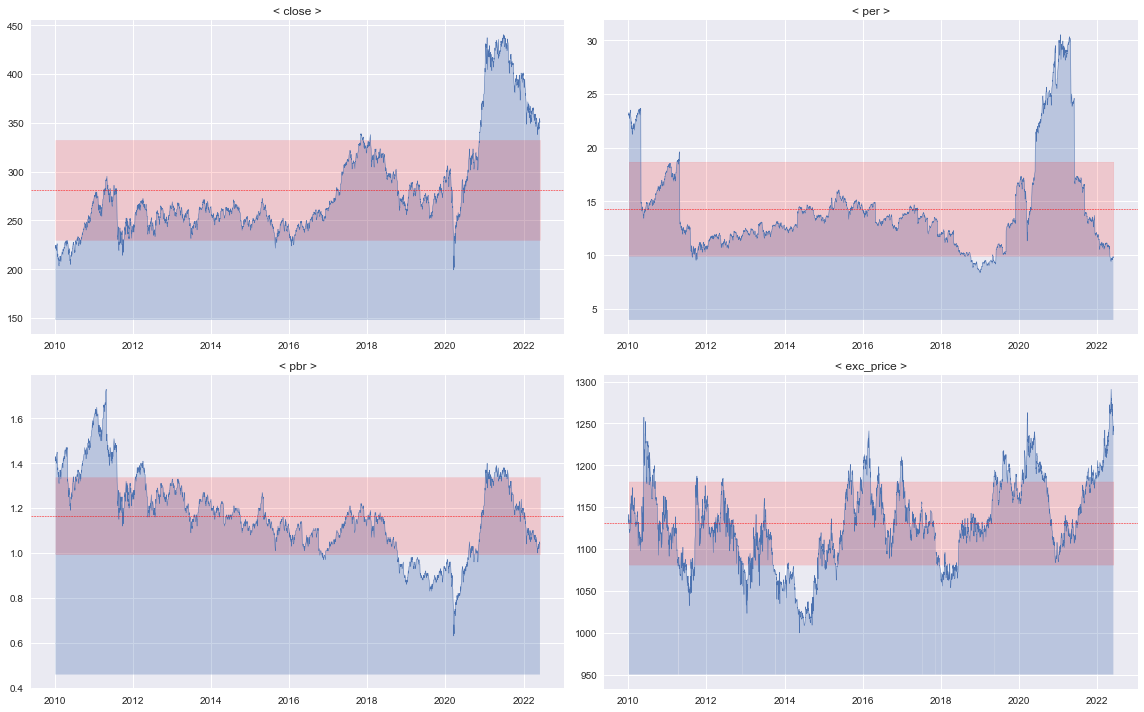

In [50]:
plt.figure(figsize=(16,10))
for i in range(len(df_ts.columns)):
    plt.subplot(int(f'22{i+1}'))
    plt.plot(df_ts.iloc[:,i], linewidth=0.5)
    plt.axhline(df_ts.iloc[:,i].mean(), color='r', linewidth=0.5, linestyle='--')
    plt.fill_between(x=df_ts.index, 
                     y1=df_ts.iloc[:,i], 
                     y2=df_ts.iloc[:,i].min() - df_ts.iloc[:,i].std(), 
                     alpha=0.3)
    plt.fill_between(x=df_ts.index, 
                     y1=df_ts.iloc[:,i].mean() + df_ts.iloc[:,i].std(), 
                     y2=df_ts.iloc[:,i].mean() - df_ts.iloc[:,i].std(), 
                     color='r', alpha=0.15)
    plt.title(f'< {df_ts.columns[i]} >')

plt.tight_layout()
plt.show()    

## Step 5. 표준화를 통해 시계열 겹쳐서 보기 & 지표간 연관성 확인

In [51]:
scaled_df = (df_ts - df_ts.mean()) / df_ts.std()
scaled_df

,close,per,pbr,exc_price
date,,,,
2022-06-03,1.379865,-1.032599,-0.738475,2.211430
2022-06-02,1.350596,-1.041722,-0.738475,2.334508
2022-05-31,1.429232,-1.014354,-0.680243,2.117360
2022-05-30,1.389231,-1.028038,-0.738475,2.427975
2022-05-27,1.302400,-1.057686,-0.796707,2.575024
...,...,...,...,...
2010-01-08,-1.144108,1.998412,1.474346,-0.160288
2010-01-07,-1.170450,1.966483,1.416114,0.077409
2010-01-06,-1.104888,2.039464,1.532579,-0.013238


In [57]:
scaled_df.describe()

,close,per,pbr,exc_price
count,3.065000e+03,3.065000e+03,3.065000e+03,3.059000e+03
mean,-5.192874e-16,-1.669138e-16,3.709195e-17,-2.304212e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.600316e+00,-1.363296e+00,-3.125992e+00,-2.643399e+00
25%,-6.221424e-01,-5.696229e-01,-6.220104e-01,-6.438371e-01
50%,-3.481834e-01,-2.480484e-01,-3.968905e-02,-5.856113e-02
75%,3.160304e-01,1.351042e-01,6.008644e-01,7.138480e-01
max,3.104597e+00,3.697511e+00,3.279543e+00,3.216802e+00


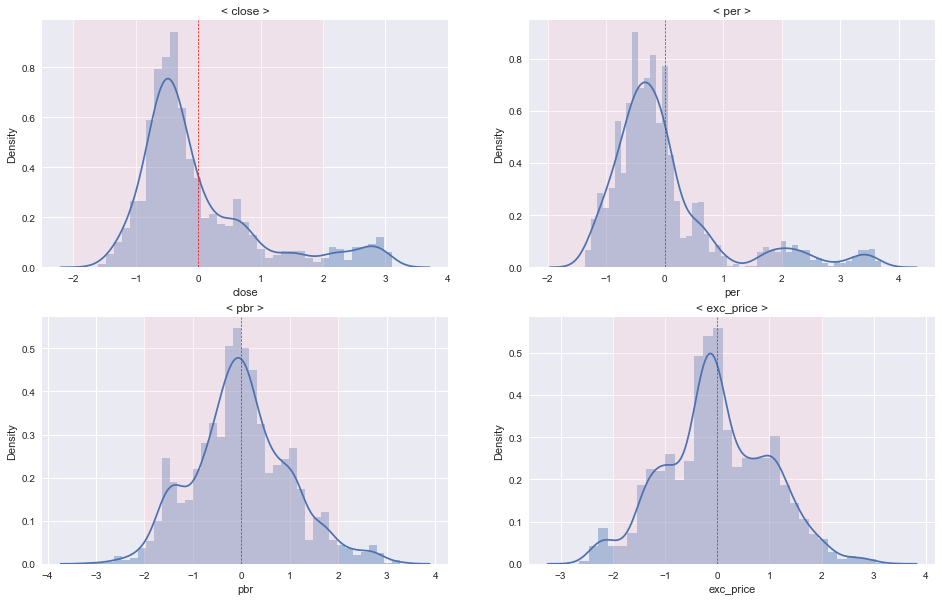

In [52]:
plt.figure(figsize=(16,10))
for i in range(len(scaled_df.columns)):
    plt.subplot(int(f'22{i+1}'))
    sns.distplot(scaled_df.iloc[:,i])
    plt.title(f'< {scaled_df.columns[i]} >')
    plt.axvline(scaled_df.iloc[:,i].mean(), c='r', linewidth=0.7, linestyle='--')
    plt.axvspan(xmin=scaled_df.iloc[:,i].mean()-2*scaled_df.iloc[:,1].std(), 
                xmax=scaled_df.iloc[:,i].mean()+2*scaled_df.iloc[:,1].std(), 
                color='pink', alpha=0.2, linewidth=0.7, linestyle='--')

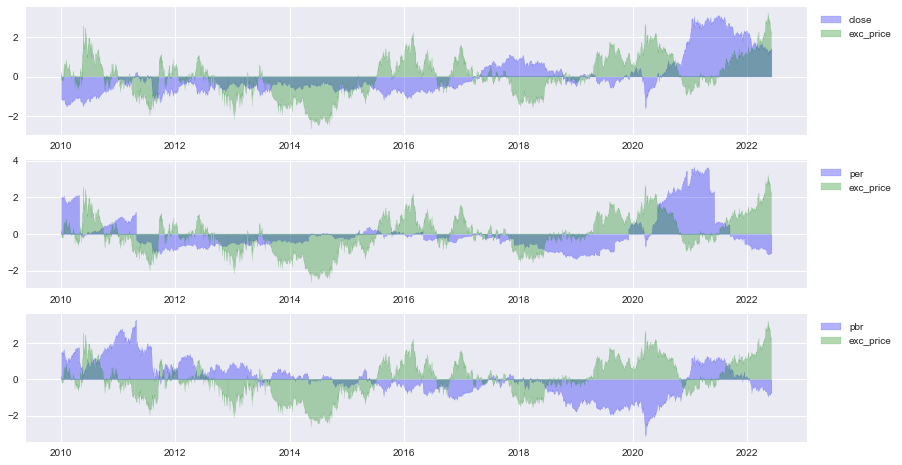

In [53]:
plt.figure(figsize=(14,8))
plt.subplot(311)
plt.fill_between(x=scaled_df.index, y1=scaled_df['close'], alpha=0.3, color='blue', label='close')
plt.fill_between(x=scaled_df.index, y1=scaled_df['exc_price'], alpha=0.3, color='g', label='exc_price')
plt.legend(bbox_to_anchor=(1.12,1))

plt.subplot(312)
plt.fill_between(x=scaled_df.index, y1=scaled_df['per'], alpha=0.3, color='blue', label='per')
plt.fill_between(x=scaled_df.index, y1=scaled_df['exc_price'], alpha=0.3, color='g', label='exc_price')
plt.legend(bbox_to_anchor=(1.12,1))

plt.subplot(313)
plt.fill_between(x=scaled_df.index, y1=scaled_df['pbr'], alpha=0.3, color='blue', label='pbr')
plt.fill_between(x=scaled_df.index, y1=scaled_df['exc_price'], alpha=0.3, color='g', label='exc_price')
plt.legend(bbox_to_anchor=(1.12,1))


plt.show()

<AxesSubplot:>

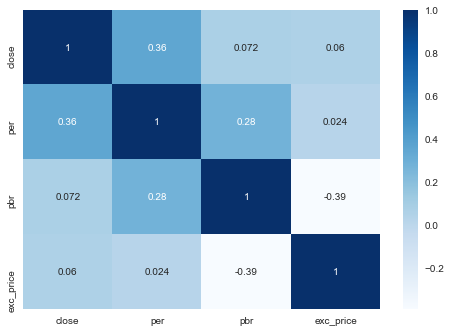

In [55]:
sns.heatmap(scaled_df.corr(), annot=True, cmap='Blues')